In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv("housing.csv")

In [3]:
house.head()#Top 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Here median_income is scaled

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#to check for nan values
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
20640 rows , 207 null values h
1. 207 observations to hata do
2. total_bedroom ko drop kr du
3. 207 values ko fill kr lia jaye.
#sabse pehle relationship check karege target variable k sath.
correlation()

In [6]:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
strong predictors , weak predictors,negative predictors

In [ ]:
#strong predictors -- median_income,total_rooms,housing_median age
#Weak predictors  -- total_bedroom,households
#negative predictors -- long,lati,pop


In [7]:
house.drop("total_bedrooms",axis = 1,inplace = True)

In [8]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
house["ocean_proximity"] = le.fit_transform(house["ocean_proximity"])

In [13]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,3


In [14]:
house.describe() #Descriptive stats

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


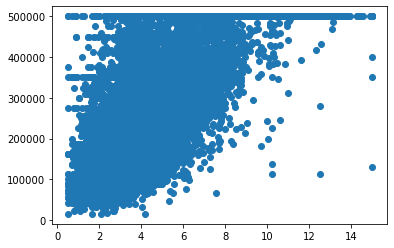

In [15]:
import matplotlib.pyplot as plt
plt.scatter(house["median_income"],house["median_house_value"])
plt.savefig("scatter.png")

In [ ]:
Train Test Splilt of data
How well your modelling is working?
housing.csv --- median_house_value is my target variable 
X --- Features
y = target

In [ ]:
X ----- features
y ----- target

In [17]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [18]:
X = house.iloc[:,[0,1,2,3,4,5,6,8]]

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,3


In [20]:
y = house.iloc[:,7]

In [21]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [24]:
lr.fit(x_train,y_train) #  making a model

LinearRegression()

In [25]:
lr.score(x_train,y_train) # R2 square

0.6322164689262568

In [27]:
lr.score(x_test,y_test) # R2 square 

0.6204380147294983

In [26]:
lr.coef_

array([-4.12533703e+04, -4.15129112e+04,  1.11282611e+03, -2.04726617e+00,
       -4.24195754e+01,  1.49305624e+02,  3.84346472e+04,  3.75569161e+02])

In [27]:
lr.intercept_

-3436478.332367566

In [ ]:
y_test --- actual values of y_train --- given target variable

In [ ]:
For x_test  we are going to make predictions

In [30]:
y_test  --- # This os y

19023    129500.0
17837    299400.0
15046    307100.0
5612     172000.0
889      333400.0
           ...   
13302    127000.0
10781    310900.0
9973     248400.0
13431    115400.0
15271    342400.0
Name: median_house_value, Length: 5160, dtype: float64

In [28]:
prediction = lr.predict(x_test)

In [29]:
prediction --- This is y_cap

array([144400.65499851, 296016.73261715, 279517.58411488, ...,
       186344.04750078, 179428.89520744, 272437.59299509])

In [31]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [32]:
e = mean_squared_error(y_test,prediction)

In [33]:
e

5010105074.042437

In [34]:
import numpy as np

In [35]:
np.sqrt(e)

70782.09571666013

In [ ]:
You need to fill total_bedroom 
and run this algo on keeping all the feature..

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 2)
x_poly = poly_feat.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_poly,y, random_state = 42, test_size = 0.20)

In [30]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lr.score(x_train,y_train)

0.6989341193115397

In [33]:
lr.score(x_test,y_test)

0.6851049077804556